In [1]:
# We need the following libraries to carry out the activities

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.dummy import DummyRegressor

import warnings
warnings.filterwarnings('ignore')


## Read the data

In [2]:
users_data = pd.read_pickle("../data/users_data_cleaned.pkl")

# read the data cleaned after eda

In [3]:
# preview the data

users_data.head()

,user_id,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,...,duration,campaign,pdays,previous,term_deposit,device_desktop,device_tablet,single,age_group_encoded,month_joined
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.00,1,0,0,0,0,0,0,...,261,1,-1,0,False,0,0,0,4,8
1,bb92765a-08de-4963-b432-496524b39157,0.0,1369.42,0,1,0,0,0,0,0,...,151,1,-1,0,False,1,0,1,2,7
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.00,0,0,1,0,0,0,0,...,76,1,-1,0,False,0,0,0,1,6
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,0.0,1369.42,0,0,0,1,0,0,0,...,92,1,-1,0,False,0,1,0,3,6
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.00,0,0,0,0,0,0,0,...,198,1,-1,0,False,0,0,1,1,8


In [4]:
# check shape of data

users_data.shape

(45179, 33)

In [5]:
# check the structure of the data - make sure all the columns are float, into and bool (apart from user_id)

users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45179 entries, 0 to 45215
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              45179 non-null  object 
 1   number_transactions  45179 non-null  float64
 2   total_amount_usd     45179 non-null  float64
 3   job_management       45179 non-null  int64  
 4   job_technician       45179 non-null  int64  
 5   job_entrepreneur     45179 non-null  int64  
 6   job_blue-collar      45179 non-null  int64  
 7   job_retired          45179 non-null  int64  
 8   job_admin.           45179 non-null  int64  
 9   job_services         45179 non-null  int64  
 10  job_self-employed    45179 non-null  int64  
 11  job_unemployed       45179 non-null  int64  
 12  job_housemaid        45179 non-null  int64  
 13  job_student          45179 non-null  int64  
 14  education_tertiary   45179 non-null  int64  
 15  education_secondary  45179 non-null 

## Define the target

In [6]:
# Definition: The target variable of a dataset is the feature of a dataset about which you want to gain a deeper understanding.

# Look at the distribution of total_amount_usd

users_data.total_amount_usd.describe()

count     45179.000000
mean       1369.751283
std        2704.291321
min       -8019.000000
25%         160.000000
50%         862.000000
75%        1369.420000
max      102127.000000
Name: total_amount_usd, dtype: float64

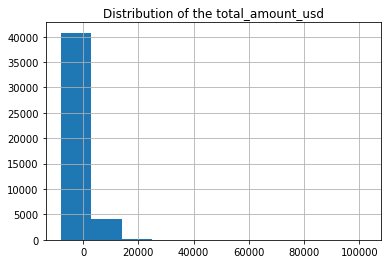

In [7]:
users_data.total_amount_usd.hist()
plt.title("Distribution of the total_amount_usd");

## Identify Outliers

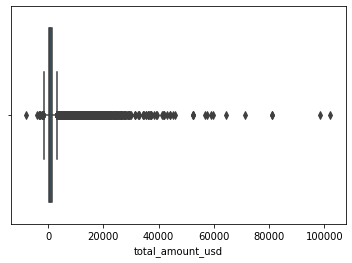

In [8]:
sns.boxplot(users_data.total_amount_usd);

In [9]:
# remove the outliers 

# identify the outliers

Q3 = np.percentile(users_data.total_amount_usd, 75) 
Q1 = np.percentile(users_data.total_amount_usd, 25)
IQR = 1.5*(Q3 - Q1)

LB = Q1 - IQR
UB = Q3 + IQR


print("Lower Bound:", round(LB, 2), "Upper Bound:", round(UB, 2))

Lower Bound: -1654.13 Upper Bound: 3183.55


## Remove the outliers

In [10]:
print("# of users with total_amount_usd greater than UB:", users_data[(users_data.total_amount_usd >= UB)].shape[0])
print("# of users with total_amount_usd lower than LB:", users_data[(users_data.total_amount_usd <= LB)].shape[0])

# of users with total_amount_usd greater than UB: 4110
# of users with total_amount_usd lower than LB: 26


In [11]:
# users_data_wout_outliers = users_data[(users_data.total_amount_usd < UB) & (users_data.total_amount_usd > LB)]
# users_data_wout_outliers.head()

users_data_wout_outliers = users_data

In [12]:
users_data_wout_outliers.shape

(45179, 33)

In [13]:
users_data_wout_outliers.describe()

,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,...,contact_telephone,duration,campaign,pdays,previous,device_desktop,device_tablet,single,age_group_encoded,month_joined
count,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,...,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000
mean,3.097833,1369.751283,0.209234,0.168043,0.032869,0.215255,0.050068,0.114389,0.091901,0.034906,...,0.064278,258.107262,2.763297,40.203391,0.580048,0.267956,0.121649,0.282897,2.147170,6.499834
std,3.749994,2704.291321,0.406767,0.373908,0.178296,0.411004,0.218087,0.318287,0.288889,0.183543,...,0.245250,257.281109,3.097836,100.134967,2.303009,0.442900,0.326884,0.450412,1.106811,3.428374
min,0.000000,-8019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
50%,2.000000,862.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,7.000000
75%,3.000000,1369.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,319.000000,3.000000,-1.000000,0.000000,1.000000,0.000000,1.000000,3.000000,9.000000
max,20.000000,102127.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,6.000000,12.000000


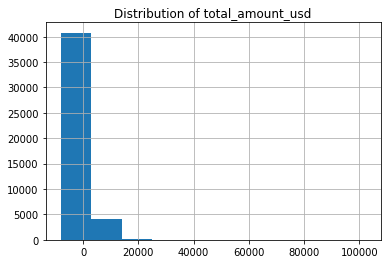

In [14]:
plt.title("Distribution of total_amount_usd")
users_data_wout_outliers.total_amount_usd.hist();

## Split data into target and features

In [15]:
# define the target and features
# A supervised machine learning algorithm requires both - uses historical data to uncover relationships between other features of your dataset and the target.

target_data = users_data_wout_outliers.total_amount_usd 
features = users_data_wout_outliers.drop(["user_id", "total_amount_usd"], axis = 1)
    

## Split data into train and test set

In [16]:
# using this handy function from scikit-learm to split the data into a training and test dataset
# we can adjust the test size to our needs, but it's best practise to train the model on 70 - 80% of the data

X_train, X_test, y_train, y_test = train_test_split(
                                                features, 
                                                target_data,
                                                test_size = 0.3, 
                                                random_state = 0)


In [17]:
# print the shape of the training data

print("Training Data")
print(X_train.shape)
print(y_train.shape)

Training Data
(31625, 31)
(31625,)


In [18]:
y_train.describe()

count     31625.000000
mean       1369.452528
std        2744.249300
min       -8019.000000
25%         160.000000
50%         859.000000
75%        1369.420000
max      102127.000000
Name: total_amount_usd, dtype: float64

## Check distribution of test data

In [19]:
# print the shape of the test data - we do not oversample the test data

print("\nTest Data")
print(X_test.shape)
print(y_test.shape)


Test Data
(13554, 31)
(13554,)


In [20]:
# check the distribution of the target 

y_test.describe()

count    13554.000000
mean      1370.448356
std       2608.779191
min      -3058.000000
25%        159.000000
50%        870.000000
75%       1369.420000
max      81204.000000
Name: total_amount_usd, dtype: float64

# Gradient Descent Based Algorithms

## Linear Regression

## Scaling the data

In [21]:
# Machine learning algorithms that use gradient descent as an optimization technique require data to be scaled.

# fit scaler on training data 

norm = StandardScaler().fit(X_train) # scale the data using is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.


In [22]:
# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

## Training the model

In [23]:
# Import the Logistic Regression model from sklearn

lr = LinearRegression()

In [24]:
# Fit the model on the scaled training data

lr.fit(X_train, y_train) 

LinearRegression()

## Making predictions

In [25]:
# Evaluate how well the model predicts on unseen data
# You can make predictions on the test data or normalized data

y_pred = lr.predict(X_test) 
print(y_pred[0:5])

[1097.11248693 1428.00518196 1649.86215038 1733.93202197 1501.93608437]


## Evaluating the model

In [26]:
# We will use r2 to evaluating the model performance.
# Very simply, r2 

r2_score(y_test, y_pred)

# R^2 (coefficient of determination) regression score function.
# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 


0.04507764476225817

# Decision Trees and Ensemble Models


Tree-based algorithms are fairly insensitive to the scale of the features. A decision tree is only splitting a node based on a single feature. This split on a feature is not influenced by other features.

## Decision Tree


## Training the data

In [27]:
clf_tree = DecisionTreeRegressor()

In [28]:
clf_tree.fit(X_train, y_train)

DecisionTreeRegressor()

## Making predictions

In [29]:
y_pred = clf_tree.predict(X_test)
print(y_pred[0:5])

[   3.     14.   1369.42 1821.   -568.  ]


In [30]:
list(y_test[0:5])

[1196.0, 566.0, 1369.42, 4833.0, 3.0]

## Evaluating the model 

In [31]:
r2_score(y_test, y_pred)

# We are moving away from negative scores. Let's see if using ensemble methods e.g. Random Forest and XGBoost improves the r2.

-1.418883069880764

## Random Forest

## Training the model

In [32]:
# Random forest is an ensemble of decision tree algorithms. 
# It is an extension of bootstrap aggregation (bagging) of decision trees.

rf = RandomForestRegressor()

In [33]:
rf.fit(X_train, y_train)

RandomForestRegressor()

## Making predictions

In [34]:
y_pred = rf.predict(X_test)
print(y_pred[0:5])

[1179.53    584.74   1660.4066 2974.52    124.1362]


In [35]:
list(y_test[0:5])

[1196.0, 566.0, 1369.42, 4833.0, 3.0]

## Evaluating the model 

In [36]:
r2_score(y_test, y_pred)

-0.042214351556441265

## XGBoost

## Training the model

In [37]:
# The Gradient Boosting Machine is a powerful ensemble machine learning algorithm that uses decision trees. 
# Boosting is a general ensemble technique that involves sequentially adding models to the ensemble where subsequent models correct the performance of prior models.

xgb = XGBRegressor()

In [38]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

## Making predictions

In [39]:
y_pred = xgb.predict(X_test)
print(y_pred[0:5])

[1497.7617 1216.2882 1587.3406 2955.8247 -846.58  ]


In [40]:
list(y_test[0:5])

[1196.0, 566.0, 1369.42, 4833.0, 3.0]

## Evaluating the model 

In [41]:
r2_score(y_test, y_pred)

# 0.55, ideally we want the r2 to be closer to 1 but this out performs the other models

0.005087642689349026

## Comparing the models

In [42]:
# model selection
models = []

# using Dummy Classifier as a baseline algorithm
models.append(('Dummy Classifier', DummyRegressor()))

# Linear Regression
models.append(('Linear Regression', LinearRegression()))

# Random Forest model
models.append(('Random Forest', RandomForestRegressor()))

# XGBoost
models.append(('XGBoost', XGBRegressor()))

In [43]:
# training every model and populating 

scoring_df = []

for name, model in models:
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # the evaluation metrics for the model
    r2 = r2_score(y_test, y_pred)
    explained_var = explained_variance_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    scoring_dict = {'Model Name': name,
                    'R2': round(r2, 4), 
                    'Explained Variance': round(explained_var, 4), 
                    'Mean Absolute Error': round(mae, 4), 
                    'Mean Squared Error': round(mse, 4)}

    scoring_df.append(scoring_dict)

Evaluation metrics for all models

In [44]:
scoring_df = pd.DataFrame(scoring_df)

scoring_df.sort_values(by = "R2", ascending = False)

,Model Name,R2,Explained Variance,Mean Absolute Error,Mean Squared Error
1,Linear Regression,0.0451,0.0451,1201.6643,6.498463e+06
3,XGBoost,0.0051,0.0051,1224.2967,6.770604e+06
0,Dummy Classifier,-0.0000,0.0000,1214.0860,6.805228e+06
2,Random Forest,-0.0469,-0.0429,1253.8136,7.124542e+06


### Evaluating the Best Model

In [45]:
# the best model is the XGBoost model, which has the highest accuracy and f1-score
# should not accept models with AUC less than 0.5 

# train the best model 

best_model = XGBRegressor()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(y_pred[0:5])

[1497.7617 1216.2882 1587.3406 2955.8247 -846.58  ]


## Residual Plots

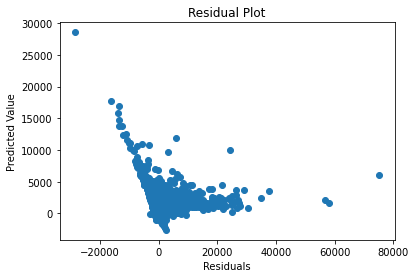

In [46]:
residuals = y_test - y_pred

plt.scatter(residuals, y_pred)
plt.title("Residual Plot")
plt.xlabel("Residuals")
plt.ylabel("Predicted Value")
plt.show();

## Feature Importance Plot

In [47]:
def feature_importance_plot(model, X_train, n):
    """Plots feature importance - this only works for Random Forest and XGBoost Models"""
    plt.figure(figsize=(8, 5)) # set figure size
    feat_importances = pd.Series(model.feature_importances_,
                                 index = X_train.columns)
    feat_importances.nlargest(n).plot(kind = 'barh')
    plt.title(f"Top {n} Features")
    plt.show()

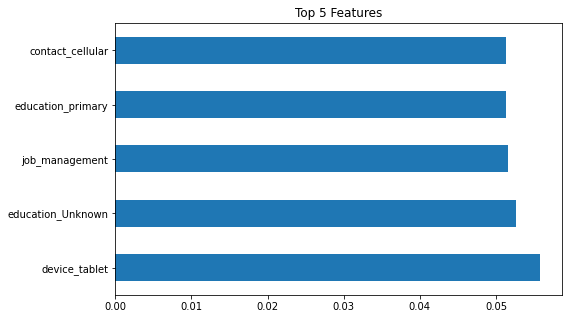

In [48]:
# plots feature importance - need to define # of features we are interested in
# to improve model performance, can remove redundant features

feature_importance_plot(best_model, X_train, 5)

Learning Curves

In [49]:
def plot_learning_curves(model, X_train, y_train):
    """Plots learning curves for model validation"""
    plt.figure(figsize=(5, 5)) # set figure size
    train_sizes, train_scores, test_scores = learning_curve(
        model,
        X_train,
        y_train,
        # Number of folds in cross-validation
        cv = 5,
        # Evaluation metric
        scoring = 'r2',
        # Use all computer cores
        n_jobs = -1,
        shuffle = True,
        # 5 different sizes of the training set
        train_sizes = np.linspace(0.01, 1.0, 5))

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color = "#111111", label = "Training score")
    plt.plot(train_sizes, test_mean, color = "#111111", label = "Cross-validation score")

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = "#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color = "#DDDDDD")

    # Create plot
    plt.title("Learning Curves")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc = "best")
    plt.tight_layout()
    

    plt.show()

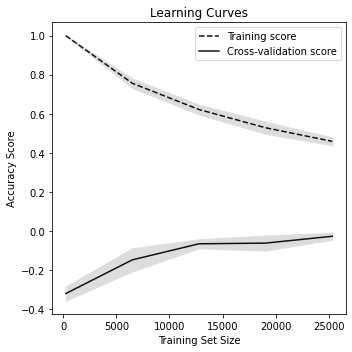

In [50]:
# A learning curve is a plot of model learning performance over experience or time. 
# Learning curves are a widely used diagnostic tool in machine learning for algorithms that learn from a training dataset incrementally. 

plot_learning_curves(best_model, X_train, y_train)
